In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.6.2



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

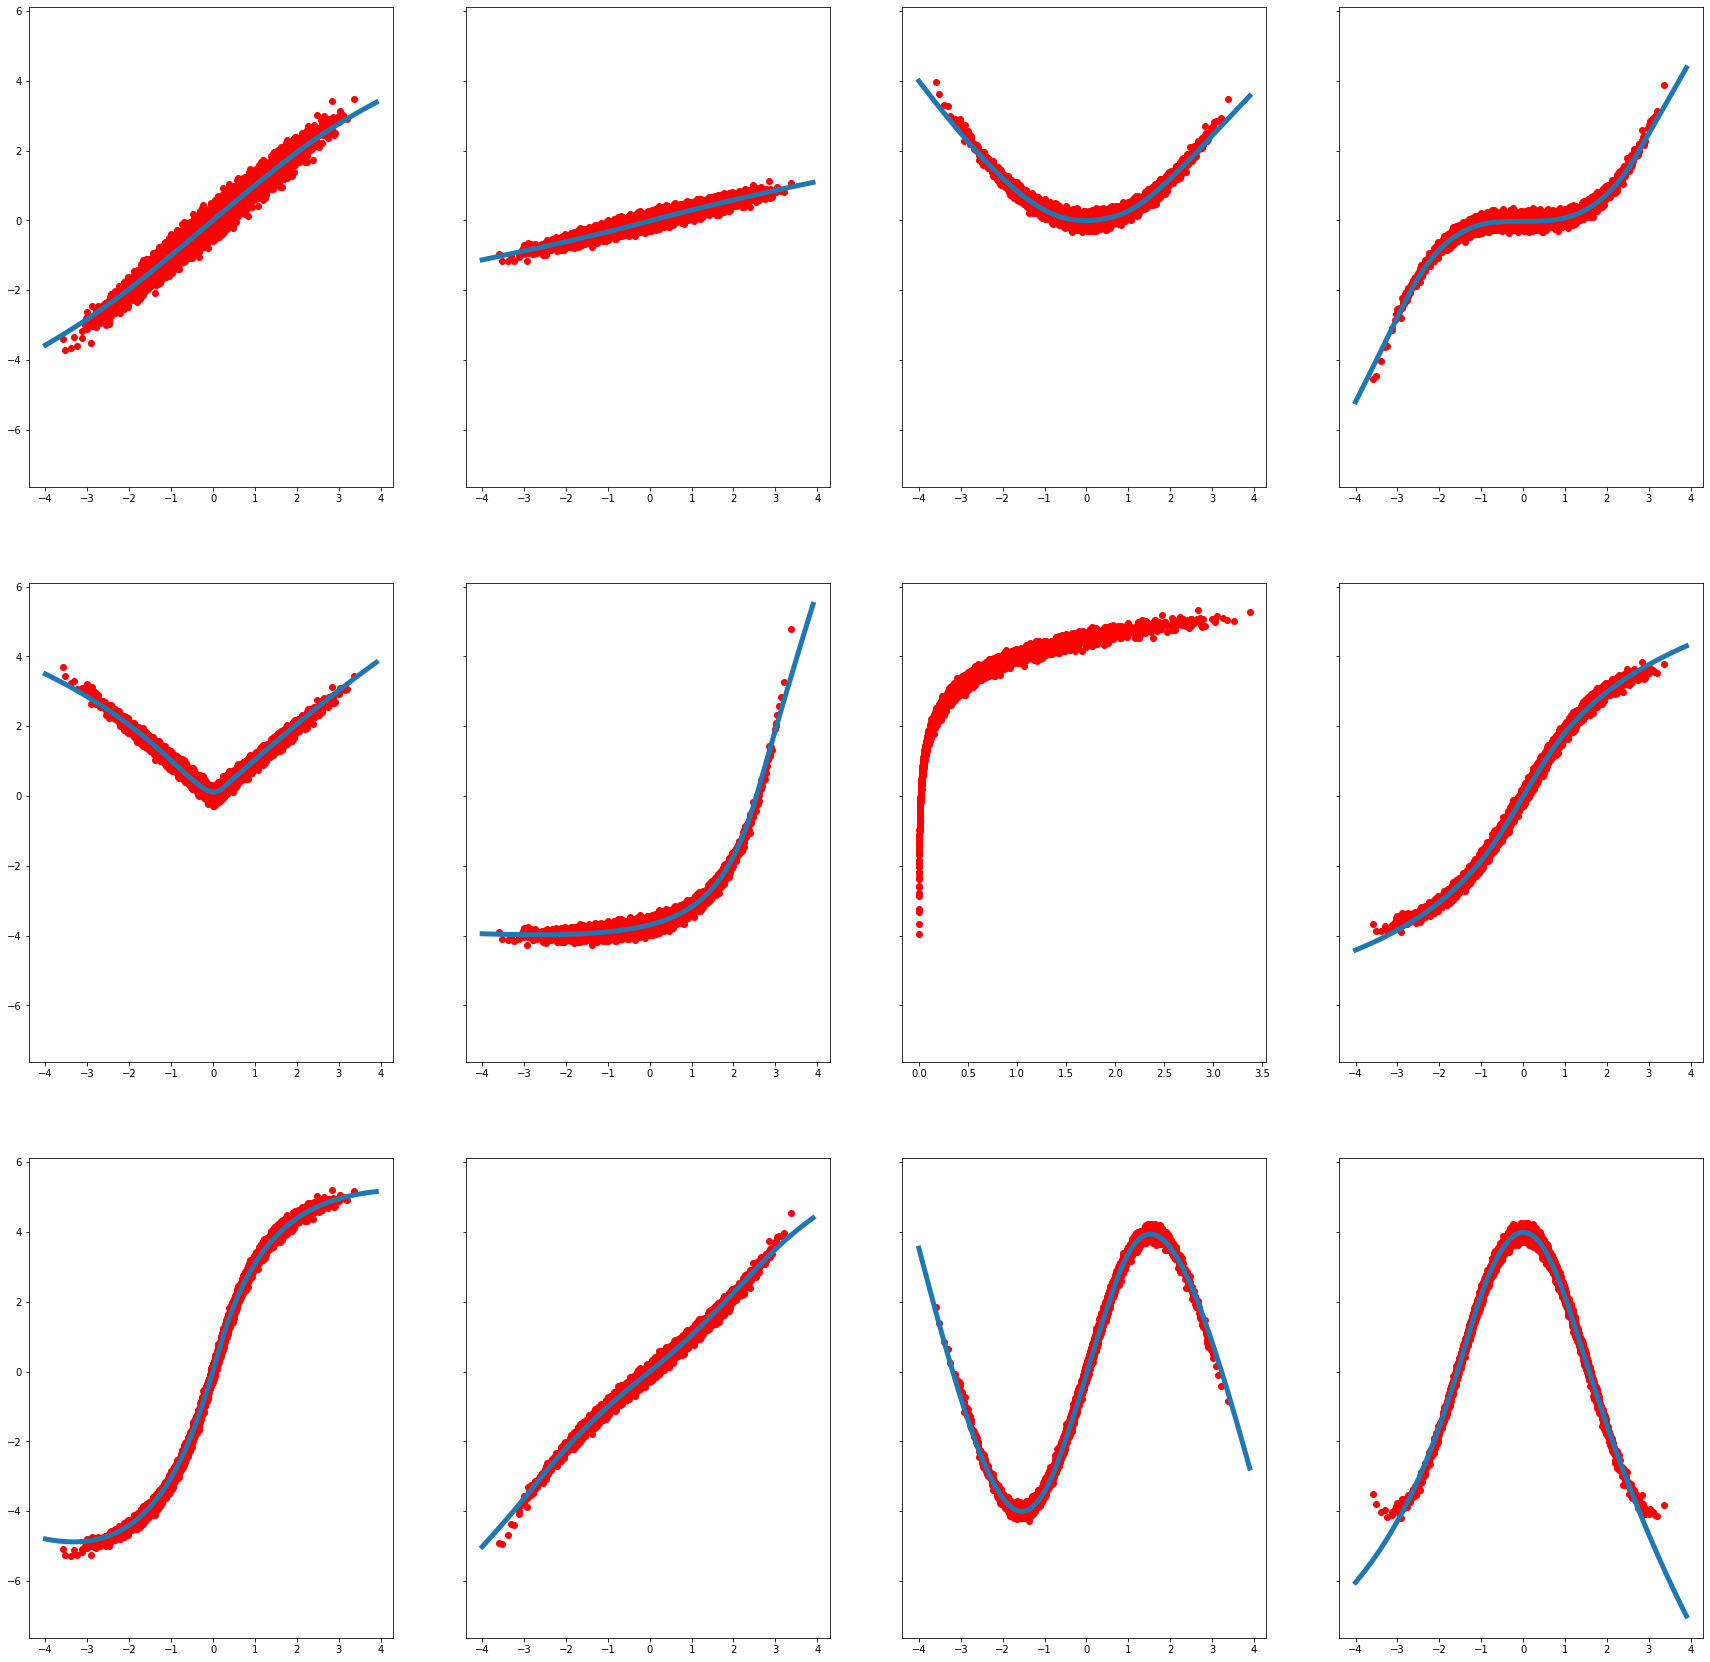

In [2]:
g = tf.random.Generator.from_seed(12345)
r = g.normal(shape=(10000, 1))
x = g.normal(shape=(10000, 1))
y1 = x + r * 0.2
y2 = 0.3 * x + r * 0.1
y3 = 0.3 * x * x + r * 0.1
y4 = 0.1 * x * x * x + r * 0.1
y5 = tf.math.abs(x) + r * 0.1
y6 = tf.math.exp(x) * 0.3 + r * 0.1 - 4
y7 = tf.math.log(x) + r * 0.1 + 4
y8 = tf.math.sigmoid(x) * 8 - 4 + r * 0.1
y9 = tf.math.atan(x) * 4 + r * 0.1
y10 = tf.math.tan(x / 4) * 4 + r * 0.1
y11 = tf.math.sin(x) * 4 + r * 0.1
y12 = tf.math.cos(x) * 4 + r * 0.1
y = [[y1, y2, y3, y4], [y5, y6, y7, y8], [y9, y10, y11, y12]]
t = tf.constant(np.arange(-4, 4, 0.1))
fig, axs = plt.subplots(3, 4, figsize=(30, 30), sharey=True)
for i in range(3):
    for j in range(4):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(4, input_shape=(1,), activation="elu"))
        model.add(tf.keras.layers.Dense(8, activation="elu"))
        model.add(tf.keras.layers.Dense(16, activation="elu"))
        model.add(tf.keras.layers.Dense(8, activation="elu"))
        model.add(tf.keras.layers.Dense(1))
        model.compile(optimizer="adam",loss="mse")
        model.fit(x / 5, y[i][j] / 5, 10, 10, verbose=0)
        axs[i][j].scatter(x, y[i][j], c='r')
        axs[i][j].plot(t, model.predict(t / 5) * 5, linewidth = 5.0)